<h1><center>Red Wine Classifier</center></h1>

#### H.M


![title](redwine.jpg)

<h4><center> Drinking wine makes predicting wine easier. But it only gets good when it's older  </center></h4>

## Import the usual suspects 

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
import os
import io 

## Load The Wine Dataset

In [2]:
wine=pd.read_csv('winequality-red.csv',sep=';')

In [3]:
# show the head of the df
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#show some infos
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#run some statistics 
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#show column names 
wine.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## EDA and Visualisation

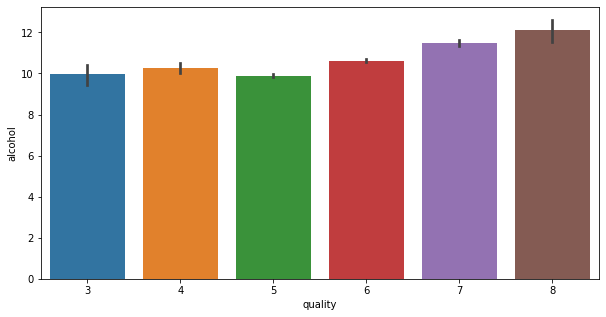

In [7]:
# let's visulize alcohol amount versus quality of the wine 
plt.figure(figsize=(10,5))
sb.barplot(data=wine,x='quality',y='alcohol')

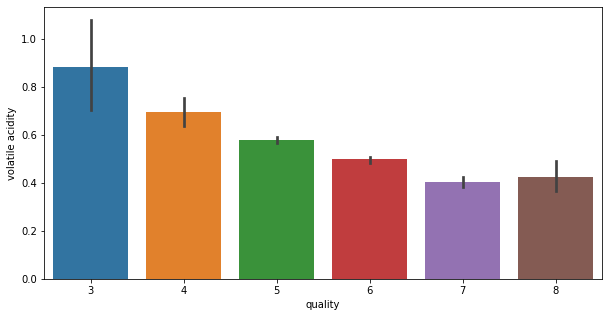

In [8]:
# let's visulize volatile acidity versus quality of the wine 
plt.figure(figsize=(10,5))
sb.barplot(data=wine,x='quality',y='volatile acidity')

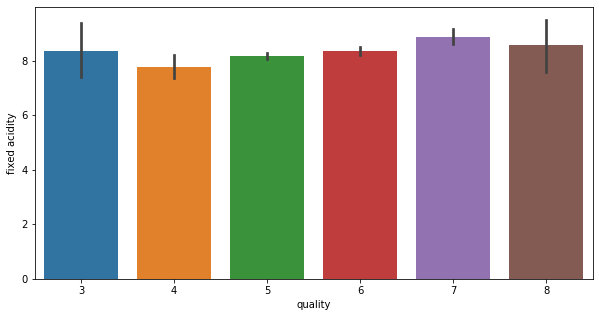

In [9]:
# let's show quality of the wine versus fixed acidity 
plt.figure(figsize=(10,5))
sb.barplot(data=wine,x='quality',y='fixed acidity')

C:\Users\hp\Anaconda\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\Anaconda\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

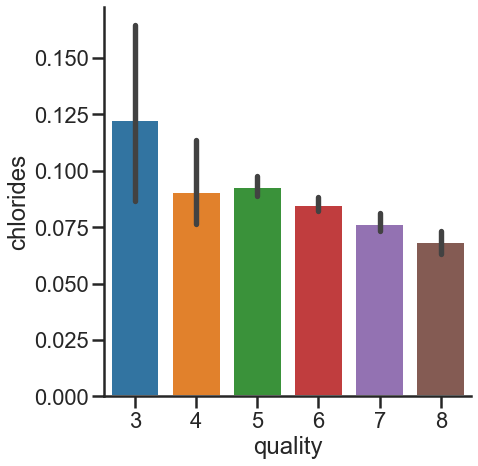

In [10]:
plt.figure(figsize=(15,6))
sb.set_context('poster')
sb.set_style('ticks')
sb.factorplot(x='quality',y='chlorides',data=wine,kind='bar',size=7)
sb.despine()

C:\Users\hp\Anaconda\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\Anaconda\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


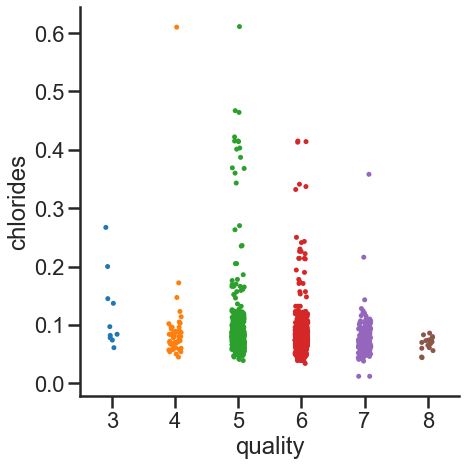

In [11]:
sb.factorplot(x='quality',y='chlorides',data=wine,kind='strip',size=7)


## Re-Labeling the target variable to 2 classes of Wine 

In [12]:
#relabeling the target variable into two cats [bad, good]
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
wine['quality'] = pd.cut(wine['quality'], bins = (2,6,8), labels =['bad','good'])

wine['quality'] = label.fit_transform(wine['quality'])


In [13]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

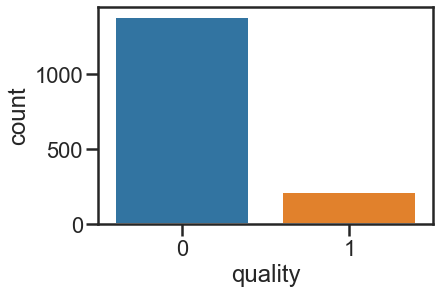

In [14]:
#plot the new classe of wine by value 
sb.countplot(data=wine, x='quality')

## Data Splitting 

In [15]:
from sklearn.model_selection import train_test_split
X=wine.drop('quality',axis=1)
y=wine['quality']
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Scaling and Standarisation of data 

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)


## Training our model with SVC

In [17]:
 from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
svc = SVC()
#Create grid parameters 
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
#training 
grid=GridSearchCV(svc,param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] 

[CV] ................................... C=100, gamma=1, total=   0.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.1s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.1s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.1s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.1s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [18]:
# let's see the best parameters to train the model with 
grid.best_params_

{'C': 1, 'gamma': 1}

In [19]:
#get the best estimator 
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [20]:
#let's run our model again with these params 
svc = SVC(C = 1, gamma =1,degree=3,kernel= 'rbf',verbose=False,max_iter=-1,decision_function_shape='ovr')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)


## Show SVC Classifier  Results 

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,pred_svc))
print('\n')
print(classification_report(y_test,pred_svc))
print('\n')
print('Accuracy Score :', accuracy_score(y_test,pred_svc))

[[405   7]
 [ 53  15]]


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       412
           1       0.68      0.22      0.33        68

    accuracy                           0.88       480
   macro avg       0.78      0.60      0.63       480
weighted avg       0.86      0.88      0.85       480



Accuracy Score : 0.875


## Naive Bayes Classifier 

In [22]:
# Train the NB model 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
#predict 
pred_nb = nb.predict(X_test)

In [23]:
#show results 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,pred_nb))
print('\n')
print(classification_report(y_test,pred_nb))
print('\n')
print('Accuracy Score :', accuracy_score(y_test,pred_nb))

[[345  67]
 [ 30  38]]


              precision    recall  f1-score   support

           0       0.92      0.84      0.88       412
           1       0.36      0.56      0.44        68

    accuracy                           0.80       480
   macro avg       0.64      0.70      0.66       480
weighted avg       0.84      0.80      0.81       480



Accuracy Score : 0.7979166666666667


## Train with Random Forest Classifier


In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [25]:
# Show RFC results 
print(confusion_matrix(y_test,pred_rfc))
print('\n')
print(classification_report(y_test,pred_rfc))
print('\n')
print('Accuracy Score :', accuracy_score(y_test,pred_rfc))

[[400  12]
 [ 42  26]]


              precision    recall  f1-score   support

           0       0.90      0.97      0.94       412
           1       0.68      0.38      0.49        68

    accuracy                           0.89       480
   macro avg       0.79      0.68      0.71       480
weighted avg       0.87      0.89      0.87       480



Accuracy Score : 0.8875


## Testing our RFC 


In [26]:
# since we got a good accuracy from random forest we will test our data with it 
test_preds=rfc.predict(X_test)
tests=pd.Series(test_preds)
#submit our predictions 
submission = pd.DataFrame({'WineId':tests.index, 'Quality': tests})
submission.to_csv('submission.csv', index=False)
print(" Submission  successfully saved!")

 Submission  successfully saved!


In [27]:
 submission['Quality'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [28]:
submission = submission.reindex(columns=['WineId','Quality'])
submission.head()

,WineId,Quality
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0


In [35]:
#define a function to turn numerical labels to categorical [bad/good wine]
def labels(x):
    if x==0:
        return 'bad'
    else:
        return 'good'
        
submission['tags'] =submission['Quality'].apply(labels)

In [36]:
submission.head()

,WineId,Quality,Wine Quality,tags
0,0,0,bad,bad
1,1,0,bad,bad
2,2,0,bad,bad
3,3,1,good,good
4,4,0,bad,bad


In [38]:
submission.drop('Wine Quality',inplace=True, axis=1)


In [40]:
submission.head()

,WineId,Quality,tags
0,0,0,bad
1,1,0,bad
2,2,0,bad
3,3,1,good
4,4,0,bad
